In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

wages_2019 = pd.read_stata('epi_cpsorg_2019.dta')
wages_2020 = pd.read_stata('epi_cpsorg_2020.dta')
wages_2021 = pd.read_stata('epi_cpsorg_2021.dta')
wages_2022 = pd.read_stata('epi_cpsorg_2022.dta')

wages_2023_jan = pd.read_stata('epi_cpsorg_2023_1.dta')
wages_2023_feb = pd.read_stata('epi_cpsorg_2023_2.dta')
wages_2023_mar = pd.read_stata('epi_cpsorg_2023_3.dta')
wages_2023_apr = pd.read_stata('epi_cpsorg_2023_4.dta')
wages_2023_may = pd.read_stata('epi_cpsorg_2023_5.dta')
wages_2023_jun = pd.read_stata('epi_cpsorg_2023_6.dta')
wages_2023_jul = pd.read_stata('epi_cpsorg_2023_7.dta')
wages_2023_aug = pd.read_stata('epi_cpsorg_2023_8.dta')
wages_2023_sep = pd.read_stata('epi_cpsorg_2023_9.dta')
wages_2023_oct = pd.read_stata('epi_cpsorg_2023_10.dta')

wages_2023 = pd.concat([wages_2023_jan, wages_2023_feb, wages_2023_mar, wages_2023_apr,
wages_2023_may, wages_2023_jun, wages_2023_jul, wages_2023_aug, wages_2023_sep, wages_2023_oct])

wages_19_abridged = wages_2019[['age','basicwgt', 'cmpwgt', 'dind03', 'famrel', 'faminc', 'hhid', 'hrhhid', 'hrhhid2', 'hoursu1i', 'hoursut',
                                'lfstat', 'month', 'multjobs', 'orgwgt', 'personid', 'wage', 'wageotc','weekpay', 'wbhaom', 'year']]
wages_20_abridged = wages_2020[['age','basicwgt', 'cmpwgt','dind03', 'famrel', 'faminc', 'hhid', 'hrhhid', 'hrhhid2', 'hoursu1i','hoursut', 
                                'lfstat', 'month', 'multjobs','orgwgt', 'personid', 'wage', 'wageotc','weekpay', 'wbhaom', 'year']]
wages_21_abridged = wages_2021[['age','basicwgt','cmpwgt','dind03', 'famrel', 'faminc', 'hhid', 'hrhhid', 'hrhhid2', 'hoursu1i','hoursut',
                                'lfstat', 'month', 'multjobs', 'orgwgt', 'personid',  'wage', 'wageotc','weekpay','wbhaom', 'year']]
wages_22_abridged = wages_2022[['age','basicwgt', 'cmpwgt','dind03','famrel', 'faminc', 'hhid', 'hrhhid', 'hrhhid2', 'hoursu1i','hoursut', 
                                'lfstat', 'month', 'multjobs', 'orgwgt','personid', 'wage', 'wageotc', 'weekpay','wbhaom', 'year']]
wages_23_abridged = wages_2023[['age','basicwgt', 'cmpwgt','dind03','famrel', 'faminc', 'hhid', 'hrhhid', 'hrhhid2', 'hoursu1i','hoursut', 
                                'lfstat', 'month', 'multjobs', 'orgwgt','personid', 'wage', 'wageotc', 'weekpay','wbhaom', 'year']]

wages19to23 = pd.concat([wages_19_abridged, wages_20_abridged, wages_21_abridged, wages_22_abridged, wages_23_abridged])

wages_19_to_23 = wages19to23[(wages19to23.lfstat == 'Employed') & (wages19to23.wageotc.isna() == False)]

print(len(wages_19_to_23))
print(len(wages_19_to_23[wages_19_to_23.wageotc.isna() == False]))
print(wages_19_to_23)

654393
654393
      age     basicwgt       cmpwgt                                  dind03  \
0      22  2730.923584  2730.923584                            Retail trade   
1      54  1718.798096  1718.798096                               Hospitals   
2      17  2544.728516  2544.728516       Food services and drinking places   
3      17  2544.728516  2544.728516       Food services and drinking places   
4      20  2705.577881  2705.577881                            Retail trade   
...    ..          ...          ...                                     ...   
20707  68   428.674591   428.674591           Personal and laundry services   
20710  48   451.198700   451.198700  Health care services, except hospitals   
20712  17   361.755310   361.755310                               Hospitals   
20720  44   345.171387   345.171387                            Retail trade   
20722  41   387.058502   387.058502                      Telecommunications   

                    famrel           

In [205]:
# wages_22_abridged_pivot = wages_22_abridged.pivot(
# columns = 'lfstat',
# index = 'lfstat',
# values = 'basicwgt'
# ).reset_index()

# print(wages_19_abridged.groupby(['lfstat']).basicwgt.count().reset_index())
# print(wages_20_abridged.groupby(['lfstat']).basicwgt.count().reset_index())
# print(wages_21_abridged.groupby(['lfstat']).basicwgt.count().reset_index())
# print(wages_22_abridged.groupby(['lfstat']).basicwgt.count().reset_index())
# print(wages_23_abridged.groupby(['lfstat']).basicwgt.count().reset_index())

# print(len(wages_22_abridged[wages_22_abridged['lfstat'] == 'Armed forces']))
# np.percentile(wages_22_abridged[wages_22_abridged['wage'].notnull()], [0.2, 0.4, 0.6, 0.8] )
# wages_22_abridged.loc[wages_22_abridged['wage'].notnull(), 'wage']

# print(len(wages_19_abridged))
# print(len(wages_20_abridged))
# print(len(wages_21_abridged))
# print(len(wages_22_abridged))
# print(len(wages_23_abridged))

wages_19_to_23['personalizedmonthlyid'] = wages_19_to_23['year'].map(str) + wages_19_to_23['hhid'].map(str) +  wages_19_to_23['personid'].map(str) +  wages_19_to_23['month'].map(str)


p_20 = np.percentile(wages_19_to_23['wageotc'], 20)
p_40 = np.percentile(wages_19_to_23['wageotc'], 40)
p_60 = np.percentile(wages_19_to_23['wageotc'], 60)
p_80 = np.percentile(wages_19_to_23['wageotc'], 80)

p_50 = np.percentile(wages_19_to_23['wageotc'], 50)

# print(p_20)
# print(p_40)
# print(p_60)
# print(p_80)
# print(p_50)

quintiles = lambda x: '1st quintile' if  x <= p_20 else ('2nd quintile' if x <= p_40 else ('3rd quintile' if x <= p_60 else ('4th quintile' if x <= p_80 else '5th quintile' )))
# def quintiles(x):
#     if x <= p_20: 
#         return '1st quintile' 
#     elif x <= p_40: 
#         return'2nd quintile' 
#     elif x <= p_60: 
#         return '3rd quintile' 
#     elif x <= p_80: 
#         return '4th quintile' 
#     else: 
#         return '5th quintile'

print(len(wages_19_to_23['personalizedmonthlyid'].unique()))

wages_19_to_23['incomequintile'] = wages_19_to_23.wageotc.apply(quintiles)
wages_19_to_23['date'] = wages_19_to_23['year'].map(str) + " " + wages_19_to_23['month'].map(str)
# wages_19_to_23 = wages_19_to_23.sort_values(['incomequintile', 'year', 'month'], inplace = True)

# print(wages_19_to_23)

wages19to23med = wages_19_to_23.groupby(['incomequintile', 'year', 'month', 'date']).wageotc.median().reset_index()



print(wages19to23med)
# print(wages_19_to_23)


/var/folders/_v/rc7h94c52kxfc277kw_2jchc0000gn/T/ipykernel_14669/629171982.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wages_19_to_23['personalizedmonthlyid'] = wages_19_to_23['year'].map(str) + wages_19_to_23['hhid'].map(str) +  wages_19_to_23['personid'].map(str) +  wages_19_to_23['month'].map(str)


654393


/var/folders/_v/rc7h94c52kxfc277kw_2jchc0000gn/T/ipykernel_14669/629171982.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wages_19_to_23['incomequintile'] = wages_19_to_23.wageotc.apply(quintiles)


    incomequintile  year  month     date    wageotc
0     1st quintile  2019      1   2019 1  11.866072
1     1st quintile  2019      2   2019 2  12.000000
2     1st quintile  2019      3   2019 3  12.000000
3     1st quintile  2019      4   2019 4  12.000000
4     1st quintile  2019      5   2019 5  12.000000
..             ...   ...    ...      ...        ...
285   5th quintile  2023      6   2023 6  57.500000
286   5th quintile  2023      7   2023 7  57.692249
287   5th quintile  2023      8   2023 8  57.674999
288   5th quintile  2023      9   2023 9  57.500000
289   5th quintile  2023     10  2023 10  57.500000

[290 rows x 5 columns]


/var/folders/_v/rc7h94c52kxfc277kw_2jchc0000gn/T/ipykernel_14669/629171982.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wages_19_to_23['date'] = wages_19_to_23['year'].map(str) + " " + wages_19_to_23['month'].map(str)


/var/folders/_v/rc7h94c52kxfc277kw_2jchc0000gn/T/ipykernel_14669/4128190142.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  medwages.set_xticklabels(medwages.get_xticklabels(), rotation = 90)


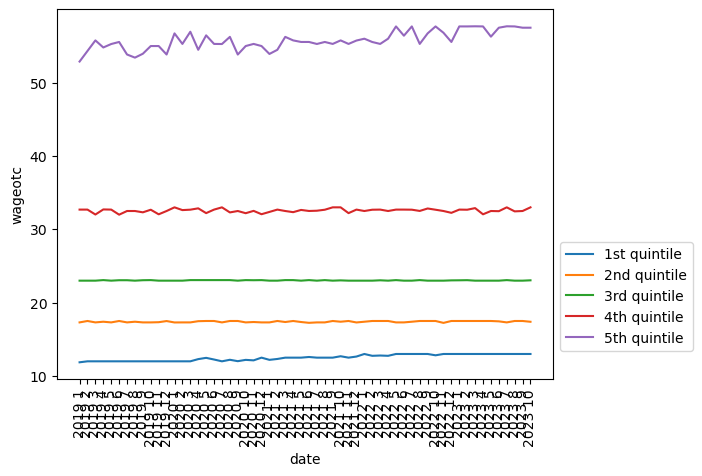

In [218]:
medwages = sns.lineplot(data = wages19to23med, x = 'date', y = 'wageotc', hue = 'incomequintile')
medwages.set_xticklabels(medwages.get_xticklabels(), rotation = 90)
plt.tick_params(axis = 'x', which = 'major')
plt.legend(bbox_to_anchor = (1, 0.39))
plt.show()

# plt.plot(wages19to23med.date, wages19to23med.wageotc)
# plt.tick_params(axis ='x', labelrotation = 90)